In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)  # Default plot size

import os
os.getcwd()

%cd /g/data/p66/ars599/work_pmm/access-s2


/g/data/p66/ars599/work_pmm/access-s2


In [21]:
'''
Functions
plot_eof2
https://pypi.org/project/sacpy/
'''
import sacpy as scp
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import sacpy.Map as smap
from scipy.linalg import svd

def plot_eof2(ssta,ttl,fName,cklon=240,cklat=0):
    '''
    # Example usage:
    # Assuming you have a variable 'ssta'
    ssta = n3_anom1.ts
    plot_eof(ssta)
    '''
    eof = scp.EOF(np.array(ssta))
    eof.solve()
    pc = eof.get_pc(npt=2)
    pt = eof.get_pt(npt=2)

    lon, lat = np.array(ssta.lon), np.array(ssta.lat)

    # Check and ensure positive pt at 90W 0N
    lon_index = np.abs(lon - cklon).argmin()  # Find the index for 120W
    lat_index = np.abs(lat - cklat).argmin()    # Find the index for 0N

    if pt[0, lat_index, lon_index] < 0:
        pt[0] *= -1
        pc[0] *= -1
    if pt[1, lat_index, lon_index] < 0:
        pt[1] *= -1
        pc[1] *= -1

    fig = plt.figure(figsize=[12, 7])
    ax = fig.add_subplot(221)
    m1 = ax.contourf(lon, lat, pt[0, :, :], cmap=shayne_cmap, levels=np.linspace(-0.75, 0.75, 15), extend="both")
    ax.contour(m1, colors="black")
    ax.set_title(ttl[0])
    ax2 = fig.add_subplot(222)
#    ax2.plot(ssta.time, pc[0])
    ax2.plot(ssta.time,pc[0])
    ax2.grid()
    ax2.set_title(ttl[1])
    ax3 = fig.add_subplot(223) #, projection=ccrs.PlateCarree(central_longitude=180))
    m2 = ax3.contourf(lon, lat, pt[1, :, :], cmap=shayne_cmap, levels=np.linspace(-0.75, 0.75, 15), extend="both")
    ax3.contour(m2, colors="black")
    ax3.set_title(ttl[2])
    ax4 = fig.add_subplot(224)
#    ax4.plot(ssta.time, pc[1])
    ax4.plot(ssta.time,pc[1])
    ax4.grid()
    ax4.set_title(ttl[3])

    cb_ax = fig.add_axes([0.1, 0.06, 0.4, 0.02])
    fig.colorbar(m1, cax=cb_ax, orientation="horizontal")
    
    plt.savefig(fName+".png",dpi=300)
    plt.show()

    # Return the PCs as a tuple
    return pc

def calculate_n3_anom(var, ystart, ylast):
    ystart_str = str(ystart).zfill(4)
    ylast_str = str(ylast).zfill(4)
    var = var.sel(time=slice(ystart_str, ylast_str))
    var_clim = var.groupby("time.month").mean(dim="time")
    var_anom = var.groupby("time.month") - var_clim
    return var_anom
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = [
    (0.0000000e+00, 0.0000000e+00, 1.0000000e+00),
    (1.0000000e-01, 1.0000000e-01, 1.0000000e+00),
    (2.0000000e-01, 2.0000000e-01, 1.0000000e+00),
    (3.0000000e-01, 3.0000000e-01, 1.0000000e+00),
    (4.0000000e-01, 4.0000000e-01, 1.0000000e+00),
    (5.0000000e-01, 5.0000000e-01, 1.0000000e+00),
    (6.0000000e-01, 6.0000000e-01, 1.0000000e+00),
    (7.0000000e-01, 7.0000000e-01, 1.0000000e+00),
    (8.0000000e-01, 8.0000000e-01, 1.0000000e+00),
    (9.0000000e-01, 9.0000000e-01, 1.0000000e+00),
    (1.0000000e+00, 1.0000000e+00, 1.0000000e+00),
    (1.0000000e+00, 9.0000000e-01, 9.0000000e-01),
    (1.0000000e+00, 8.0000000e-01, 8.0000000e-01),
    (1.0000000e+00, 7.0000000e-01, 7.0000000e-01),
    (1.0000000e+00, 6.0000000e-01, 6.0000000e-01),
    (1.0000000e+00, 5.0000000e-01, 5.0000000e-01),
    (1.0000000e+00, 4.0000000e-01, 4.0000000e-01),
    (1.0000000e+00, 3.0000000e-01, 3.0000000e-01),
    (1.0000000e+00, 2.0000000e-01, 2.0000000e-01),
    (1.0000000e+00, 1.0000000e-01, 1.0000000e-01),
    (1.0000000e+00, 0.0000000e+00, 0.0000000e+00)
]

# Create the colormap
shayne_cmap = LinearSegmentedColormap.from_list("shayne_cmap", colors)

In [3]:
idir='/g/data/p66/ars599/obs/month/ecmwf/era5/'

ds_psl = xr.open_dataset(idir+'ERA5_1979-2023_N96_psl_anom.nc')
ds_lh = xr.open_dataset(idir+'ERA5_1979-2023_N96_slhf_anom.nc')
ds_uasa = xr.open_dataset(idir+'ERA5_1979-2023_N96_uas_anom.nc')
ds_vasa = xr.open_dataset(idir+'ERA5_1979-2023_N96_vas_anom.nc')
ds_sst = xr.open_dataset(idir+'ERA5_1979-2023_N96_sst_anom.nc')

In [4]:
idir = '/g/data/p66/ars599/obs/month/access-s2/'
ds_hc300 = xr.open_dataset(idir+'access-s2_1981-2023_N96_hc300_anom.nc')
ds_d20 = xr.open_dataset(idir+'access-s2_1981-2023_N96_d20_anom.nc')
ds_hc300 = ds_hc300.rename({'time_counter': 'time'})
ds_d20 = ds_d20.rename({'time_counter': 'time'})


## Monthly 2D Anomaly from 2022 to 2023

Additionally, concerning this year's El Niño, if we proceed, the initial step would involve plotting its complete spatiotemporal evolution. Ideally, we should begin earlier, perhaps from June 2022 to December 2023, illustrating the global patterns of SST anomalies, SLPA, TAUXY anomalies, along with the evolution of OHC and thermocline averages within the equatorial Pacific region (5N-5S). This aims to uncover any potential findings or trends during this period.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


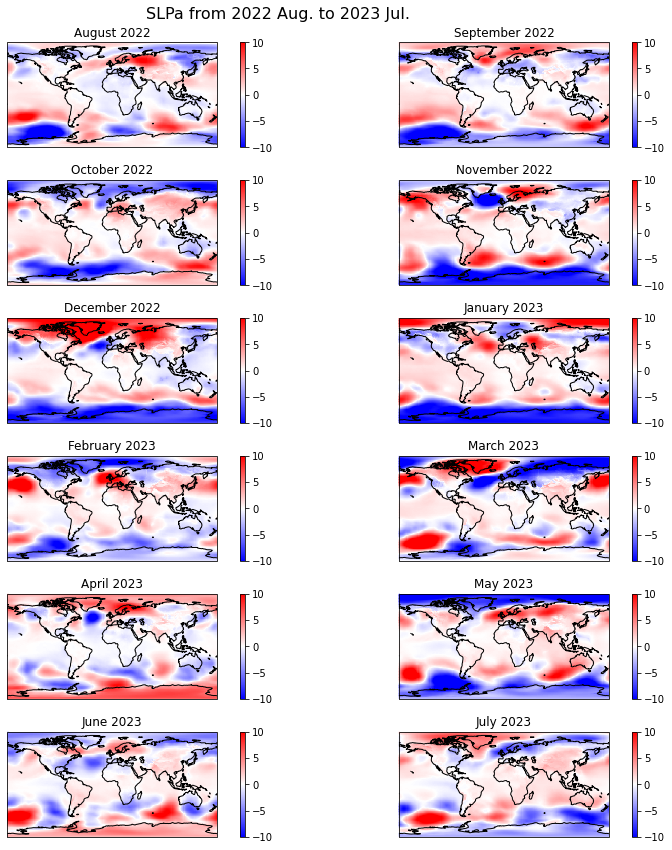

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

# Assuming you have 12 months from June 2022 to July 2023
months = pd.date_range(start='2022-08-01', end='2023-07-01', freq='MS')

fig, axs = plt.subplots(6, 2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # Flatten the 2D array of axes to iterate easily

for i, month in enumerate(months):
    ds_month = ds_psl.sp.sel(time=month) / 100  # psl convert the unit
    ax = axs[i]
    pcm = ax.pcolormesh(ds_month.lon, ds_month.lat, ds_month, shading='auto', transform=ccrs.PlateCarree(), cmap=shayne_cmap)
    pcm.set_clim(-10, 10)  # Set color limits
    ax.set_title(month.strftime("%B %Y"))  # Set title with month and year
    plt.colorbar(pcm, ax=ax)  # Add colorbar for each subplot
    ax.coastlines()  # Show continental coastlines

plt.rcParams['font.family'] = 'Arial'  # Replace 'Arial' with an available font from your system
plt.suptitle('SLPa from 2022 Aug. to 2023 Jul.', fontsize=16)  # Adding a main title to the figure
plt.tight_layout()
plt.show()


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


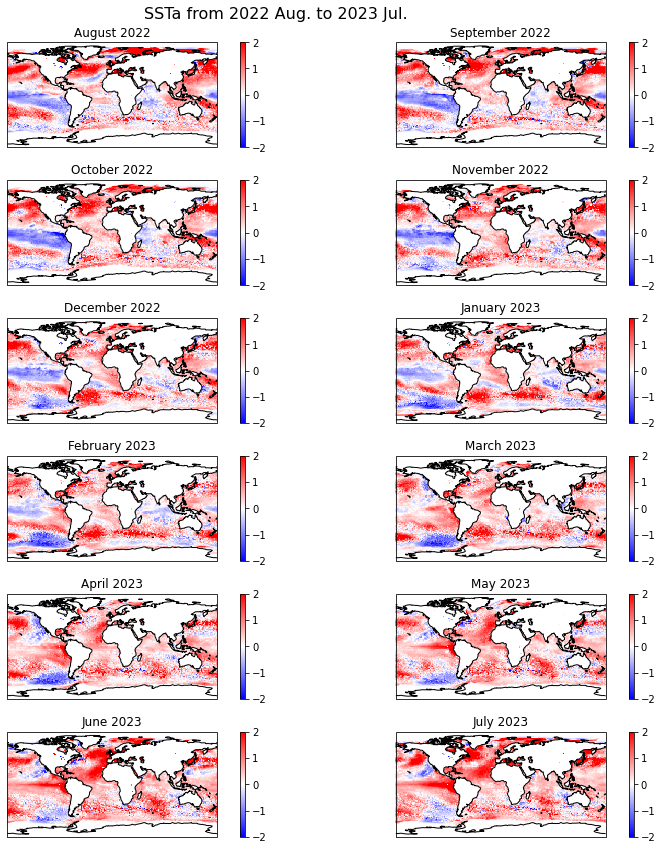

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

# Assuming you have 12 months from June 2022 to July 2023
months = pd.date_range(start='2022-08-01', end='2023-07-01', freq='MS')

fig, axs = plt.subplots(6, 2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # Flatten the 2D array of axes to iterate easily

for i, month in enumerate(months):
    ds_month = ds_sst.sst.sel(time=month)
    ax = axs[i]
    pcm = ax.pcolormesh(ds_month.lon, ds_month.lat, ds_month, shading='auto', transform=ccrs.PlateCarree(), cmap=shayne_cmap)
    pcm.set_clim(-2, 2)  # Set color limits
    ax.set_title(month.strftime("%B %Y"))  # Set title with month and year
    plt.colorbar(pcm, ax=ax)  # Add colorbar for each subplot
    ax.coastlines()  # Show continental coastlines

plt.rcParams['font.family'] = 'Arial'  # Replace 'Arial' with an available font from your system
plt.suptitle('SSTa from 2022 Aug. to 2023 Jul.', fontsize=16)  # Adding a main title to the figure
plt.tight_layout()
plt.show()


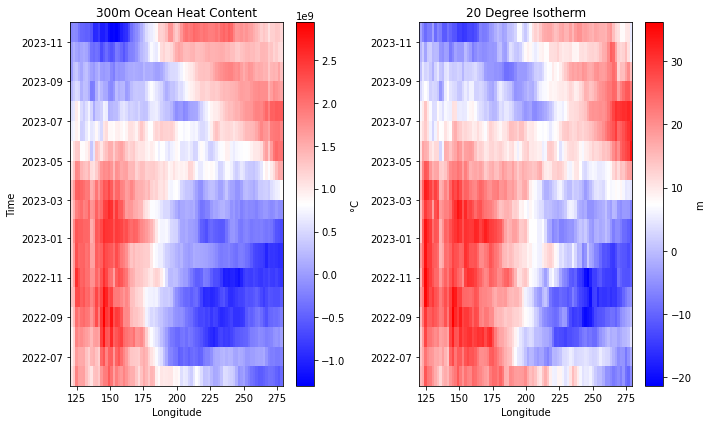

In [7]:
pac_hc300 = ds_hc300.hc300.sel(lon=slice(120, 280), lat=slice(-5, 5)).mean('lat').sel(time=slice('2022-06-01', '2023-12-01'))
pac_d20 = ds_d20.d20.sel(lon=slice(120, 280), lat=slice(-5, 5)).mean('lat').sel(time=slice('2022-06-01', '2023-12-01'))

fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})

# Left subplot (axs[0])
plt.sca(axs[0])
plt.pcolormesh(pac_hc300.lon, pac_hc300.time, pac_hc300, shading='auto', cmap=shayne_cmap)
plt.title('300m Ocean Heat Content')
plt.xlabel('Longitude')
plt.ylabel('Time')
plt.colorbar(label='°C')

# Right subplot (axs[1])
plt.sca(axs[1])
plt.pcolormesh(pac_d20.lon, pac_d20.time, pac_d20, shading='auto', cmap=shayne_cmap)
plt.title('20 Degree Isotherm')
plt.xlabel('Longitude')
plt.ylabel('')  # No ylabel for the second subplot
plt.colorbar(label='m')

plt.tight_layout()
plt.show()


## Monthly 1D Anomaly from 2022 to 2023

Then plot time series for NINO3.4, NINO3, NINO4 SST anomalies, thermocline depth in the equatorial Pacific (120E-80W, 5N-5S), meridional wind field in the central equatorial Pacific, IOD index, NPMM index, ATL3 index, NTA (North Tropical Atlantic SST) index, NAT (North Atlantic Tripole SST) index, and NPO index.

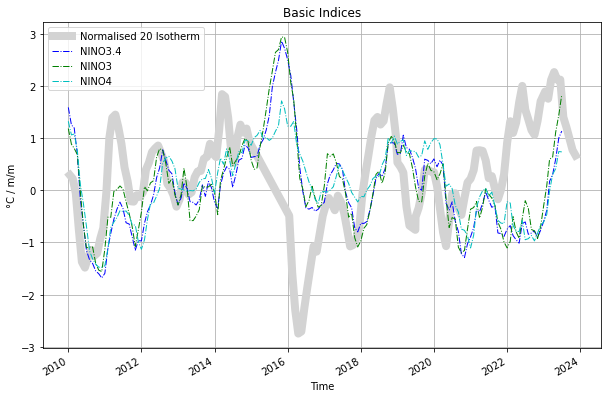

In [8]:
# Define NINO regions
nino3 = ds_sst.sst.sel(lon=slice(210, 270), lat=slice(-5, 5)).mean(['lon', 'lat']).sel(time=slice('2010', '2023'))
nino4 = ds_sst.sst.sel(lon=slice(160, 210), lat=slice(-5, 5)).mean(['lon', 'lat']).sel(time=slice('2010', '2023'))
nino34 = ds_sst.sst.sel(lon=slice(190, 240), lat=slice(-5, 5)).mean(['lon', 'lat']).sel(time=slice('2010', '2023'))
pac_d20 = ds_d20.d20.sel(lon=slice(120, 280), lat=slice(-5, 5)).mean(['lon', 'lat']).sel(time=slice('2010', '2023'))
pac_d20 = pac_d20 / pac_d20.std()


# Plotting the NINO3.4 region
pac_d20.plot(label='Normalised 20 Isotherm', c='lightgrey', linestyle='-', linewidth=8)
nino34.plot(label='NINO3.4', c='b', linestyle='-.', linewidth=1)
nino3.plot(label='NINO3 ', c='g', linestyle='-.', linewidth=1)
nino4.plot(label='NINO4 ', c='c', linestyle='-.', linewidth=1)

plt.legend()
plt.grid()
plt.title('Basic Indices')
plt.xlabel('Time')
plt.ylabel('°C / m/m');


## Atlantic Indices

* ATL3:  (3° S–3° N, 20° W–0°) SSTA
* NTA: (10°N to 25°N, 60°W to 20°W) SSTA
* https://www.science.org/doi/10.1126/sciadv.abg9690 
* NAT: EOF2 of SST anomalies over the North Atlantic (north of 20°N)
* https://journals.ametsoc.org/view/journals/clim/25/6/jcli-d-11-00164.1.xml?tab_body=fulltext-display
* https://journals.ametsoc.org/view/journals/clim/35/18/JCLI-D-21-0594.1.xml


### Monthly

In [9]:
# Define NINO regions
ATL3_mon = ds_sst.sst.sel(lon=slice(340, 360), lat=slice(-3, 3)).mean(['lon', 'lat'])
NTA_mon = ds_sst.sst.sel(lon=slice(300, 320), lat=slice(10, 25)).mean(['lon', 'lat'])

# Define the regions for the western and eastern poles of the Indian Ocean
western_pole = ds_sst.sst.sel(lon=slice(50, 70), lat=slice(-10, 10)).mean(['lon', 'lat'])
eastern_pole = ds_sst.sst.sel(lon=slice(90, 110), lat=slice(-10, 0)).mean(['lon', 'lat'])

# Calculate the IOD index by taking the difference between the two poles
IOD_mon = western_pole - eastern_pole

/home/599/ars599/.local/lib/python3.9/site-packages/sacpy/EOF.py:116: ComplexWarning: Casting complex values to real discards the imaginary part
  patterns[:, self.flag] = e_vector[:dim_min]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


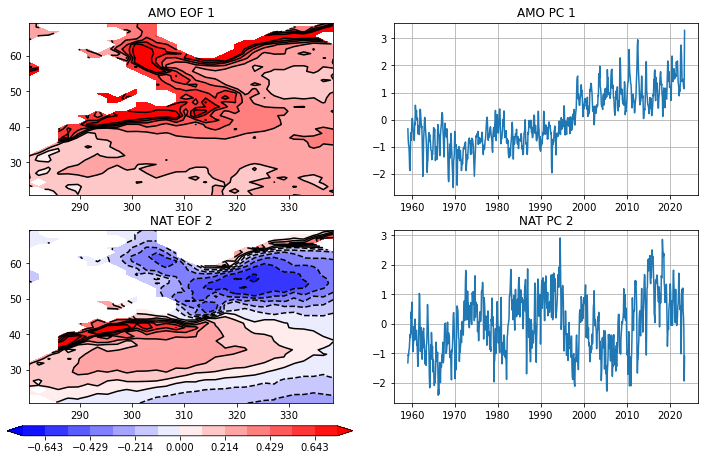

In [22]:
'''
Only for NAT
'''
AMO = ds_sst.sst.sel(lat=slice(20,70),lon=slice(280,340))
ttl = ('AMO EOF 1','AMO PC 1','NAT EOF 2','NAT PC 2')
fName = "amo_anom_eof"
pcs_amo = plot_eof2(AMO,ttl,fName,310,40)
# plt.savefig('EAR_AMO_PC1_NTA_PC2.png', dpi=300)

amo = ds_sst.sst.sel(lon=slice(280,340),lat=slice(20,70)).mean(['lat','lon']).rolling(time=1, center=True).mean()
amopc1 = amo*0 + pcs_amo[0].real
amopc2 = amo*0 + pcs_amo[1].real


/home/599/ars599/.local/lib/python3.9/site-packages/sacpy/EOF.py:116: ComplexWarning: Casting complex values to real discards the imaginary part
  patterns[:, self.flag] = e_vector[:dim_min]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


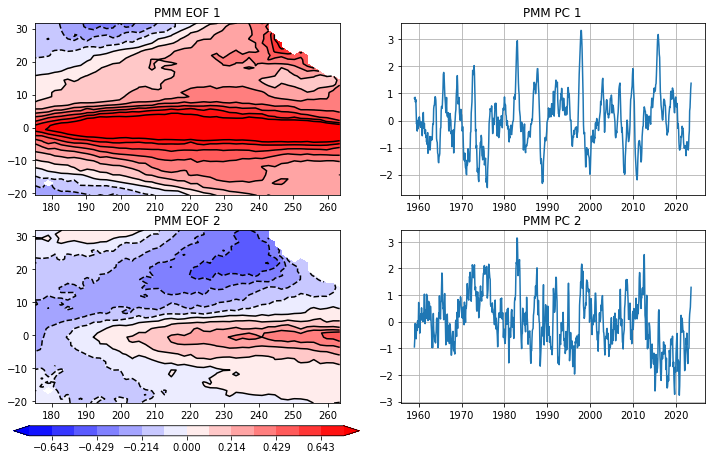

In [23]:
'''
pmm from ora_s5
32°N– 21°S and 175°E–95°W
'''

PMM = ds_sst.sst.sel(lat=slice(-21,32),lon=slice(175,265))

ttl = ('PMM EOF 1','PMM PC 1','PMM EOF 2','PMM PC 2')
fName = "pmm_anom_eof"
pcs_pmm = plot_eof2(PMM,ttl,fName,240,0)
#plt.savefig('EAR_ENSO_PC1_PMM_PC2.png', dpi=300)

pmmpc1 = amo*0 + pcs_pmm[0].real
pmmpc2 = amo*0 + pcs_pmm[1].real

/home/599/ars599/.local/lib/python3.9/site-packages/sacpy/EOF.py:116: ComplexWarning: Casting complex values to real discards the imaginary part
  patterns[:, self.flag] = e_vector[:dim_min]
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


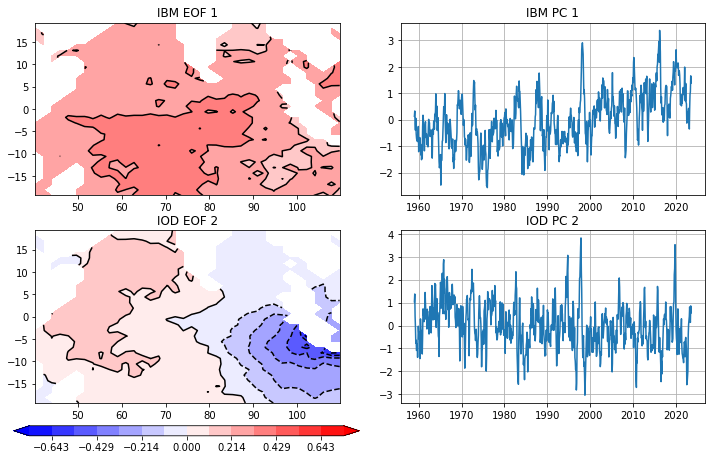

In [26]:
'''
IOD and IBM
20°N– 20°S and 40°E–110°E
'''

IBM = ds_sst.sst.sel(lat=slice(-20,20),lon=slice(40,110))

ttl = ('IBM EOF 1','IBM PC 1','IOD EOF 2','IOD PC 2')
fName = "ibm_anom_eof"
pcs_ibm = plot_eof2(IBM,ttl,fName,50,0)
#plt.savefig('EAR_ENSO_PC1_PMM_PC2.png', dpi=300)

ibmpc1 = amo*0 + pcs_ibm[0].real
ibmpc2 = amo*0 + pcs_ibm[1].real

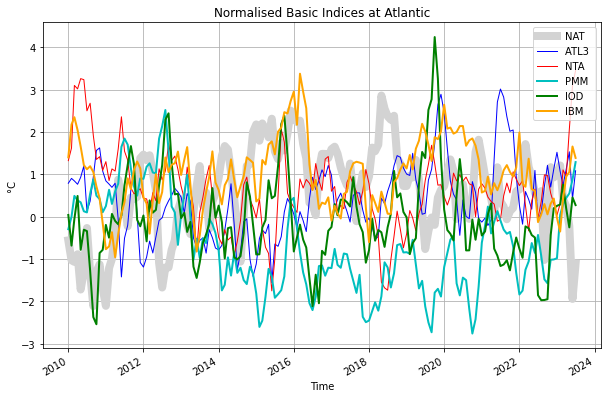

In [27]:
# Plotting the NINO3.4 region
NAT_mon = amopc2.rolling(time=1, center=True).mean()
PMM_mon = pmmpc2.rolling(time=1, center=True).mean()
IBM_mon = ibmpc1.rolling(time=1, center=True).mean()

ATL3 = ATL3_mon / ATL3_mon.std()
NTA = NTA_mon / NTA_mon.std()
NAT = NAT_mon / NAT_mon.std()
PMM = PMM_mon / PMM_mon.std()
IOD = IOD_mon / IOD_mon.std()
IBM = IBM_mon / IBM_mon.std()

NAT.sel(time=slice('2010', '2023')).plot(label='NAT ', c='lightgrey', linestyle='-', linewidth=8)
ATL3.sel(time=slice('2010', '2023')).plot(label='ATL3 ', c='b', linestyle='-', linewidth=1)
NTA.sel(time=slice('2010', '2023')).plot(label='NTA ', c='r', linestyle='-', linewidth=1)
PMM.sel(time=slice('2010', '2023')).plot(label='PMM ', c='c', linestyle='-', linewidth=2)
IOD.sel(time=slice('2010', '2023')).plot(label='IOD ', c='g', linestyle='-', linewidth=2)
IBM.sel(time=slice('2010', '2023')).plot(label='IBM ', c='orange', linestyle='-', linewidth=2)

plt.legend()
plt.grid()
plt.title('Normalised Basic Indices at Atlantic')
plt.xlabel('Time')
plt.ylabel('°C');

### Seasonal

ATL3: Sea Surface Temperature Anomalies (SSTA) in the region (3° S–3° N, 20° W–0°)
NTA: Sea Surface Temperature Anomalies (SSTA) in the region (10°N to 25°N, 60°W to 20°W)
Regarding NAT and NTA, the references provided can be reviewed for further details. Although the definitions might have slight differences, attention should be given to different seasons, such as ATL3 in JJA, NAT in MAM, NAT possibly in DJF, PMM in MAM or FMA, and IOD in SON. The articles included in the links will provide more information about these indices.

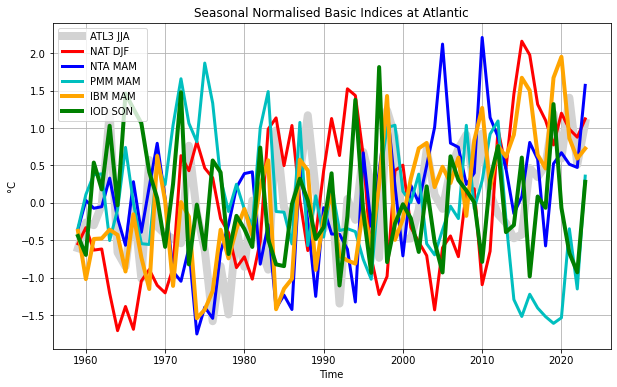

In [28]:
ATL3_JJA = ATL3.where((ATL3['time.month'] >= 6) | (ATL3['time.month'] <= 8), drop=True)
ATL3_JJA = ATL3_JJA.groupby('time.year').mean('time')

NAT_DJF = NAT.where((NAT['time.month'] >= 12) | (NAT['time.month'] <= 2), drop=True)
NAT_DJF = NAT_DJF.groupby('time.year').mean('time')

NTA_MAM = NTA.where((NTA['time.month'] >= 3) | (NTA['time.month'] <= 5), drop=True)
NTA_MAM = NTA_MAM.groupby('time.year').mean('time')

PMM_MAM = PMM.where((PMM['time.month'] >= 3) | (PMM['time.month'] <= 5), drop=True)
PMM_MAM = PMM_MAM.groupby('time.year').mean('time')

IBM_MAM = IBM.where((IBM['time.month'] >= 3) | (IBM['time.month'] <= 5), drop=True)
IBM_MAM = IBM_MAM.groupby('time.year').mean('time')

IOD_SON = IOD.where((IOD['time.month'] >= 9) | (IOD['time.month'] <= 11), drop=True)
IOD_SON = IOD_SON.groupby('time.year').mean('time')

# plot
ATL3_JJA.plot(label='ATL3 JJA ', c='lightgrey', linestyle='-', linewidth=8);
NAT_DJF.plot(label='NAT DJF ', c='r', linestyle='-', linewidth=3)
NTA_MAM.plot(label='NTA MAM ', c='b', linestyle='-', linewidth=3);
PMM_MAM.plot(label='PMM MAM ', c='c', linestyle='-', linewidth=3);
IBM_MAM.plot(label='IBM MAM ', c='orange', linestyle='-', linewidth=4)
IOD_SON.plot(label='IOD SON ', c='g', linestyle='-', linewidth=4)

plt.legend()
plt.grid()
plt.title('Seasonal Normalised Basic Indices at Atlantic')
plt.xlabel('Time')
plt.ylabel('°C');